- Name: Muhammad Rizki Achirlita
- Gmail: muh.rizkiachirlita@gmail.com

## Load Dataset

In [17]:
# Load package
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns

In [18]:
df = pd.read_csv('hotel_after_processing.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
67715,City Hotel,0,173,2018,November,38,13,2,5,2,...,0,0,0,No Deposit,0,Personal,126.9,0,1,Check-Out
24473,Resort Hotel,0,12,2018,January,47,19,0,1,2,...,0,0,0,No Deposit,0,Personal,29.0,0,0,Check-Out
49129,City Hotel,1,94,2019,August,25,18,1,0,2,...,0,0,0,No Deposit,0,Personal,126.0,0,0,Canceled
5631,Resort Hotel,1,201,2018,October,34,15,2,5,2,...,0,0,0,No Deposit,0,Personal,140.0,0,1,Canceled
20137,Resort Hotel,0,206,2018,August,26,25,3,6,2,...,0,0,1,No Deposit,0,Family,88.2,0,1,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85640 entries, 0 to 85639
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85640 non-null  object 
 1   is_canceled                     85640 non-null  int64  
 2   lead_time                       85640 non-null  int64  
 3   arrival_date_year               85640 non-null  int64  
 4   arrival_date_month              85640 non-null  object 
 5   arrival_date_week_number        85640 non-null  int64  
 6   arrival_date_day_of_month       85640 non-null  int64  
 7   stays_in_weekend_nights         85640 non-null  int64  
 8   stays_in_weekdays_nights        85640 non-null  int64  
 9   adults                          85640 non-null  int64  
 10  children                        85640 non-null  int64  
 11  babies                          85640 non-null  int64  
 12  meal                            

## Monthly Hotel Booking Analysis Based on Hotel Type!

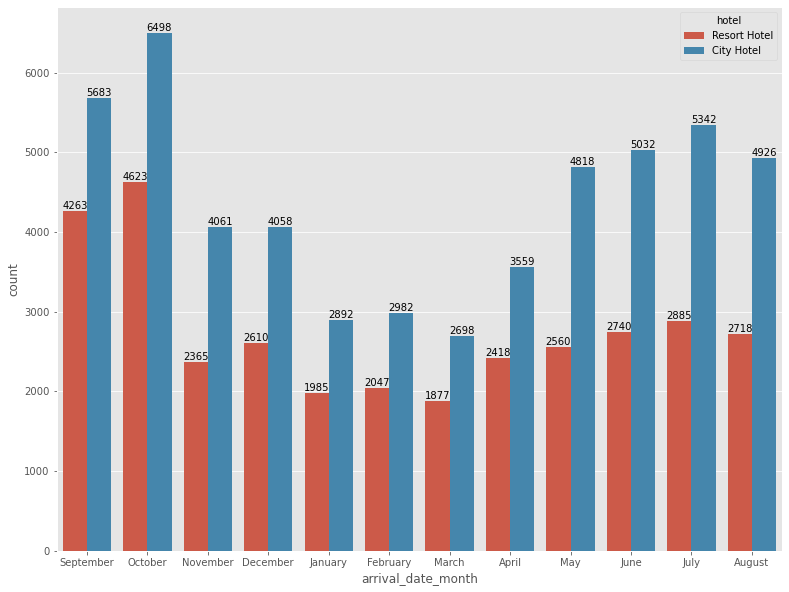

In [40]:
plt.figure(figsize=(13, 10))
ax=sns.countplot(x='arrival_date_month', hue='hotel', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

plt.savefig('task-2.png')

### Analysis

Dari chart di atas, sudah di dapat beberapa kesimpulan antara lain:
- Penjualan tipe hotel **selalu** di dominasi oleh City Hotel di setiap bulannya
- Dari bulan Maret sampai Oktober, penjualan kamar hotel (baik itu Resort Hotel ataupun City Hotel) selalu **konsisten** naik. Hanya terjadi sedikit penurunan pada bulan Agustus
- Puncak penjualan terjadi pada bulan Oktober sebesar 6498 untuk City Hotel dan 4623 untuk Resort Hotel

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [65]:
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
agg_df = df.groupby(['hotel', 'is_canceled']).agg({'stay_duration' : 'sum'}).reset_index()
agg_df

,hotel,is_canceled,stay_duration
0,City Hotel,0,110193
1,City Hotel,1,55674
2,Resort Hotel,0,107161
3,Resort Hotel,1,39498


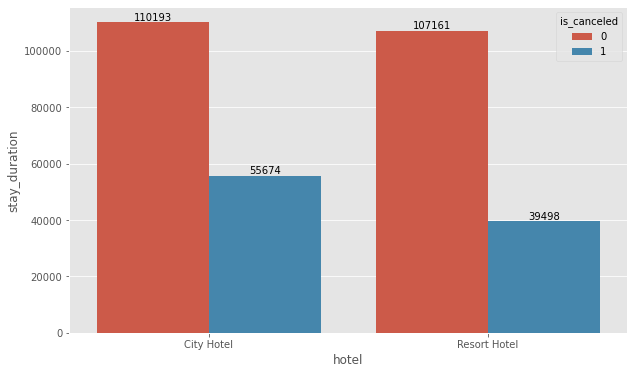

In [90]:
plt.figure(figsize=(10, 6))
ax= sns.barplot(x='hotel', y='stay_duration', hue='is_canceled', data=agg_df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

plt.savefig('task-3a.png')

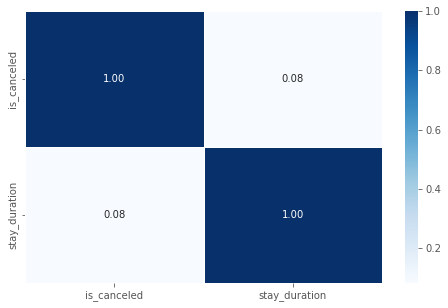

In [91]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['is_canceled', 'stay_duration']].corr(), cmap='Blues', annot=True, fmt='.2f', linewidth=1);

plt.savefig('task-3b.png')

### Analysis

Feature `stay_duration` didapat dari feature `stays_in_weekend_nights` dijumlahkan dengan `stays_in_weekdays_nights`. Dari hasil koefisien korelasi di atas, keputusan canceled customer tidak dipengaruhi oleh stay duration (karena korelasinya sangat kecil). Meski begitu, rasio pembatalan antara masing-masing tipe `hotel` dengan `stay_duration` mengkhawatirkan. Karena nilainya lebih dari 25%.

## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate!

In [124]:
df['lead_time'].quantile([0.25, 0.50, 0.75])

0.25     11.0
0.50     49.0
0.75    124.0
Name: lead_time, dtype: float64

In [128]:
## Categorize lead_time based on its quantile
df['lead_time_category'] = np.where(df['lead_time'] <= 11, 'short', np.where(df['lead_time'] > 124, 'long', 'moderate'))

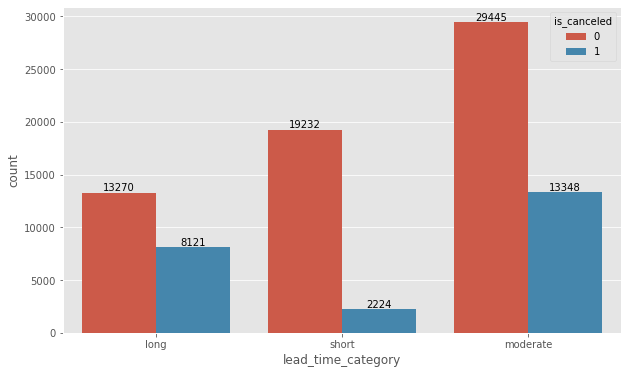

In [130]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='lead_time_category', hue='is_canceled', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

plt.savefig('task-4a.png')

### Analysis

Berdasarkan visualisasi di atas, cancelation rate meningkat ketika `lead_time` semakin lama. Hal ini dapat dilihat dari **proporsi antara cancelation rate terhadap uncancelation yang semakin meningkat ketika `lead_time` semakin lama.**

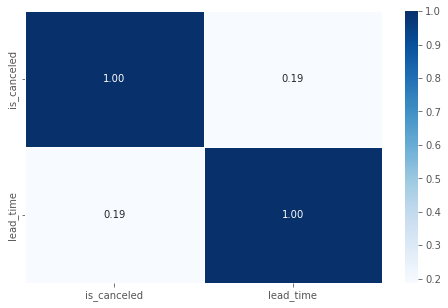

In [129]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['is_canceled', 'lead_time']].corr(), cmap='Blues', annot=True, fmt='.2f', linewidth=1);

plt.savefig('task-4b.png')

### Analysis

Berdasarkan analisis sebelumnya, saya melakukan pembuktian dengan melihat koefisien korelasi menggunakan heatmap di atas. Hasilnya, `lead_time` akan mempengaruhi keputusan customer untuk melakukan cancel atau tidak (`is_canceled`). Hanya saja hubungannya tidak besar karena hanya sebesar 0.19 atau **< 0.30**. 